In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataframe = pd.read_csv('Maternal Health Risk Data Set.csv')
dataframe.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
#Análisis de los datos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
#Visualización de los datos
columnasdf = dataframe.columns
vardep = columnasdf[len(columnasdf)-1]
for i in columnasdf:
    print("\n",dataframe.groupby(i).size())


 Age
10     4
12    35
13    12
14     3
15    60
16    16
17    63
18    19
19    67
20    22
21    38
22    45
23    71
24     3
25    48
26     3
27     9
28    28
29    40
30    30
31    22
32    48
33     5
34     5
35    50
36     4
37     6
38     2
39     4
40    37
41     1
42    23
43     5
44     3
45     9
46     1
48    26
49     9
50    43
51     1
54    12
55    37
56     1
59     2
60    34
62     1
63     2
65     3
66     1
70     1
dtype: int64

 SystolicBP
70       7
75       8
76      16
78       3
80       5
83       2
85      43
90     154
95      12
99       2
100     92
110     19
115      8
120    449
129      1
130     60
135      3
140    120
160     10
dtype: int64

 DiastolicBP
49      25
50      24
60     174
63       8
65      87
68       2
69       1
70     100
75      38
76       3
80     226
85      49
89       1
90     153
95      36
100     87
dtype: int64

 BS
6.00      21
6.10      53
6.30       2
6.40      10
6.50       1
6.60       2
6.70      

In [20]:
categorias = {"low risk": 0, "mid risk": 1, "high risk": 2}

x = dataframe.drop(vardep, axis=1)
y = dataframe[vardep]
y = y.map(categorias)

In [22]:
x.info()
print("\n",vardep)
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.7 KB

 RiskLevel


0    2
1    2
2    2
3    2
4    0
Name: RiskLevel, dtype: int64

In [24]:
x.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [26]:
#Variables de prueba y testeo
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_esc = scaler.fit_transform(x_train)
x_test_esc = scaler.transform(x_test)

print(x_train_esc)
from sklearn.metrics import classification_report, confusion_matrix

[[ 0.48215645  0.37098479  0.98947502  0.68073198 -0.48233538  1.69764907]
 [-0.96421091 -1.26070391 -1.17665648  0.07943633  2.46319249  1.44555289]
 [ 1.78388708  1.45877726  1.35049694  3.08591457 -0.48233538  0.3111201 ]
 ...
 [ 2.14547892  0.37098479  0.26743119 -0.37153541 -0.48233538  0.05902393]
 [-0.60261907 -0.71680768 -0.81563456 -0.58198889 -0.48233538  1.69764907]
 [-0.81957417  0.37098479  0.26743119 -0.52185932 -0.48233538 -0.57121651]]


In [28]:
#Prueba del modelo
from xgboost import XGBClassifier

modeloGB = XGBClassifier(n_estimators=100, random_state=42)
modeloGB.fit(x_train_esc, y_train)

prediccionesGB=modeloGB.predict(x_test_esc)

print(classification_report(y_test,prediccionesGB,target_names=list(categorias.keys())))

              precision    recall  f1-score   support

    low risk       0.85      0.89      0.87       122
    mid risk       0.77      0.77      0.77        98
   high risk       0.94      0.89      0.92        85

    accuracy                           0.85       305
   macro avg       0.85      0.85      0.85       305
weighted avg       0.85      0.85      0.85       305



Menor tasa de error:  0.14098360655737704 
n_estimators:  115


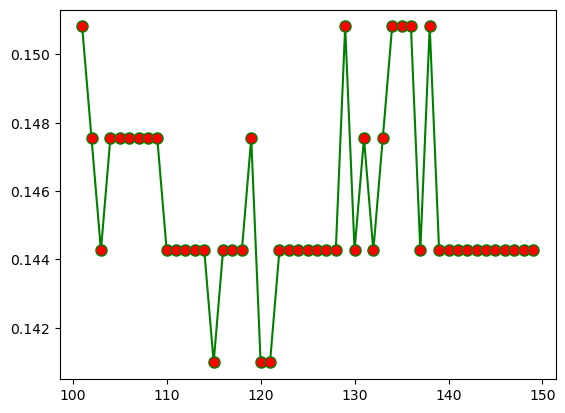

In [46]:
#optimizacion del modelo
tasa_error = []
menor_GB = float(1)
nes = 50
for i in range(1,50):
    modeloGB =XGBClassifier(n_estimators=100 + i, random_state=42)
    modeloGB.fit(x_train_esc,y_train)
    modeloGB_i=modeloGB.predict(x_test_esc)
    error = np.mean(modeloGB_i != y_test)
    tasa_error.append(error)

    if error < menor_GB:
        menor_GB = error
        nes = 100 + i

plt.plot(range(101,150),tasa_error,color='green',marker='o', markerfacecolor='red',markersize='8')
print("Menor tasa de error: ", menor_GB, "\nn_estimators: ", nes)

In [48]:
modeloGB = XGBClassifier(n_estimators=nes, random_state=42)
modeloGB.fit(x_train_esc, y_train)

prediccionesGB=modeloGB.predict(x_test_esc)

print(classification_report(y_test,prediccionesGB,target_names=list(categorias.keys())))

              precision    recall  f1-score   support

    low risk       0.85      0.90      0.88       122
    mid risk       0.80      0.77      0.78        98
   high risk       0.94      0.91      0.92        85

    accuracy                           0.86       305
   macro avg       0.86      0.86      0.86       305
weighted avg       0.86      0.86      0.86       305



In [52]:
#Prueba con datos reales
datos_prueba = [[25, 130, 80, 15.0, 98.0, 86], 
                [32, 120, 90, 6.9, 98.0, 70],
                [29, 90, 70, 8.0, 100.0, 80],
                [35, 120, 60, 6.1, 98.0, 76]]

print("DATOS DE PRUEBA")
for i in range(0,4):
    datos_obesidad_esc = scaler.transform(pd.DataFrame([datos_prueba[i]],columns=x.columns))
    print("\nDatos: \t\t", datos_prueba[i])
    print("Predicción: \t", modeloGB.predict(datos_obesidad_esc))
    print("Probabilidades: ", modeloGB.predict_proba(datos_obesidad_esc))

DATOS DE PRUEBA

Datos: 		 [25, 130, 80, 15.0, 98.0, 86]
Predicción: 	 [2]
Probabilidades:  [[2.7094368e-04 5.7786573e-02 9.4194245e-01]]

Datos: 		 [32, 120, 90, 6.9, 98.0, 70]
Predicción: 	 [1]
Probabilidades:  [[0.23519288 0.7620863  0.00272085]]

Datos: 		 [29, 90, 70, 8.0, 100.0, 80]
Predicción: 	 [2]
Probabilidades:  [[1.1160287e-04 9.8527614e-03 9.9003571e-01]]

Datos: 		 [35, 120, 60, 6.1, 98.0, 76]
Predicción: 	 [0]
Probabilidades:  [[0.7664522 0.2318272 0.0017206]]
